# Домашнее задание 2 - предобработка признаков, pandas


### О задании

Практическое задание 2 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы, которые позднее будут учитываться при проставлении оценок автоматом по курсу.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания получившийся файл \*.ipynb с решением необходимо выложить в свой репозиторий github.

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [41]:
import numpy as np

**1. (0.2 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [42]:
def max_element(arr):
    zero_indices = np.where(arr[:-1] == 0)[0]
    if zero_indices.size == 0:
        return None
    return np.max(arr[zero_indices + 1])

**2. (0.2 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [43]:
def nearest_value(X, v):
    idx = np.abs(X - v).argmin()
    return X.flat[idx]

**3. (0.2 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [44]:
def scale(X):
    means = X.mean(axis=0)
    stds = X.std(axis=0)
    stds[stds == 0] = 1.0
    return (X - means) / stds

**4. (0.2 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [45]:
def get_stats(X):
    return {
        "det": np.linalg.det(X),
        "trace": np.trace(X),
        "min": X.min(),
        "max": X.max(),
        "fro_norm": np.linalg.norm(X, ord='fro'),
        "eig": np.linalg.eigvals(X),
        "inv": np.linalg.inv(X)
    }

**5. (0.2 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [46]:
A = np.random.standard_normal((100, 10, 10))
B = np.random.standard_normal((100, 10, 10))
C = np.matmul(A, B)
max_elements = C.max(axis=(1, 2))
print(f"Среднее значение максимального количества элементов: {max_elements.mean()}")
print(f"95-процентная квантиль: {np.percentile(max_elements, 95)}")

Среднее значение максимального количества элементов: 8.60862559261968
95-процентная квантиль: 11.766403319830811


### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

Данные находятся в приложенном файле `2008.csv`. Их [описание](http://stat-computing.org/dataexpo/2009/the-data.html) приведено ниже:

Airline on-time performance

Have you ever been stuck in an airport because your flight was delayed or cancelled and wondered if you could have predicted it if you'd had more data? This is your chance to find out.

The data
The data set is available for download here.
The data consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. This is a large dataset: there are nearly 120 million records in total, and takes up 1.6 gigabytes of space compressed and 12 gigabytes when uncompressed.

Understanding and preparing the data
In order to answer above questions, we are going to analyze the provided dataset, containing up to 1936758 ### different internal flights in the US for 2008 and their causes for delay, diversion and cancellation

The data comes from the U.S. Department of Transportation’s (DOT) Bureau of Transportation Statistics (BTS). Meta data explanations

This dataset is composed by the following variables:

**Year** 2008 **Month** 1-12 **DayofMonth** 1-31 **DayOfWeek** 1 (Monday) - 7 (Sunday)  
**DepTime** actual departure time (local, hhmm)  
**CRSDepTime** scheduled departure time (local, hhmm)  
**ArrTime** actual arrival time (local, hhmm)  
**CRSArrTime** scheduled arrival time (local, hhmm)  
**UniqueCarrier** unique carrier code  
**FlightNum** flight number  
**TailNum** plane tail number: aircraft registration, unique aircraft identifier  
**ActualElapsedTime** in minutes  
**CRSElapsedTime** in minutes  
**AirTime** in minutes  
**ArrDelay** arrival delay, in minutes: A flight is counted as “on time” if it operated less than 15 minutes later the scheduled time shown in the carriers’ Computerized Reservations Systems (CRS).  
**DepDelay** departure delay, in minutes  
**Origin** origin IATA airport code  
**Dest** destination IATA airport code  
**Distance** in miles  
**TaxiIn** taxi in time, in minutes  
**TaxiOut** taxi out time in minutes  
**Cancelled** *was the flight cancelled  
**CancellationCode** reason for cancellation (A = carrier, B = weather, C = NAS, D = security)  
**Diverted** 1 = yes, 0 = no  
**CarrierDelay** in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.  
**WeatherDelay** in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.  
**NASDelay** in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.  
**SecurityDelay** in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.  
**LateAircraftDelay** in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

In [47]:
import pandas as pd
%matplotlib inline

**6. (0.3 балла)** Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [48]:
data = pd.read_csv('2008.csv')
data['CancellationCode'].value_counts().idxmax()

'A'

**7. (0.3 балла)** Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [49]:
data['Distance'].agg(['mean', 'min', 'max'])

mean     724.508257
min       31.000000
max     4962.000000
Name: Distance, dtype: float64

**8. (0.3 балла)** Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [50]:
min_dist = data['Distance'].min()
suspicious_flights = data[data['Distance'] == min_dist]
print('Подозрительные полеты:')
print(suspicious_flights[['Year', 'Month', 'DayofMonth', 'FlightNum', 'Origin', 'Dest', 'Distance']])

flight_nums = suspicious_flights['FlightNum'].unique()
other_days = data[data['FlightNum'].isin(flight_nums) & (data['Distance'] != min_dist)]
print('\nТе же рейсы в другие дни (статистика расстояния):')
print(other_days['Distance'].describe())

Подозрительные полеты:
       Year  Month  DayofMonth  FlightNum Origin Dest  Distance
1116   2008     12          30         65    WRG  PSG        31
6958   2008     12          26         65    WRG  PSG        31
17349  2008      8          18         64    PSG  WRG        31
27534  2008      3          11         64    PSG  WRG        31
46082  2008      8           9         65    WRG  PSG        31
48112  2008      2          28         64    PSG  WRG        31

Те же рейсы в другие дни (статистика расстояния):
count      72.000000
mean      827.055556
std       703.268684
min        82.000000
25%       339.500000
50%       581.000000
75%      1005.000000
max      2454.000000
Name: Distance, dtype: float64


**9. (0.3 балла)** Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [51]:
data['Origin'].value_counts().idxmax()

'ATL'

**10. (0.3 балла)** Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [52]:
mean_airtimes = data.groupby('Origin')['AirTime'].mean()
print('Среднее эфирное время для каждого аэропорта:')
print(mean_airtimes)
print('\nАэропорт с максимальным средним эфирным временем:', mean_airtimes.idxmax())

Среднее эфирное время для каждого аэропорта:
Origin
ABE    88.266667
ABI    36.400000
ABQ    93.454321
ABY    35.714286
ACK    50.800000
         ...    
WRG    18.000000
XNA    85.945736
YAK    35.900000
YKM    79.000000
YUM    47.470588
Name: AirTime, Length: 297, dtype: float64

Аэропорт с максимальным средним эфирным временем: SJU


**11. (0.5 балла)** Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [53]:
dep_stat = data.groupby('Origin').agg({'DepDelay': [lambda x: (x > 0).mean(), 'count']})
dep_stat.columns = ['delay_ratio', 'count']
dep_stat[dep_stat['count'] > 1000]['delay_ratio'].idxmax()

'EWR'

## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12. (0.5 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [54]:
print('Анализ пропущенных значений:')
print('1. Какие-либо пропущенные значения?', data.isnull().any().any())
print('2. Total missing elements:', data.isnull().sum().sum())
print('3. Общее количество отсутствующих элементов:', data.isnull().any(axis=1).sum())
print('4. Функции, в которых отсутствует хотя бы одна:', data.isnull().any(axis=0).sum())

Анализ пропущенных значений:
1. Какие-либо пропущенные значения? True
2. Total missing elements: 355215
3. Общее количество отсутствующих элементов: 70000
4. Функции, в которых отсутствует хотя бы одна: 16


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [55]:
print('Оригинальная форма:', data.shape)
# Check target missing
print('Количество пропущенных целей:', data['DepDelay'].isnull().sum())

# Drop missing target and target=0
data = data.dropna(subset=['DepDelay'])
data = data[data['DepDelay'] != 0]

y = data['DepDelay']
X = data.drop('DepDelay', axis=1)
print('Новая форма после очистки:', X.shape)

Оригинальная форма: (70000, 29)
Количество пропущенных целей: 1399
Новая форма после очистки: (63404, 28)


**13. (0.5 балла)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [56]:
def split_time(df, feature):
    df[feature + '_Hour'] = df[feature] // 100
    df[feature + '_Minute'] = df[feature] % 100
    df.drop(feature, axis=1, inplace=True)

for feat in ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']:
    split_time(X, feat)

print('Столбцы после разделения по времени:')
print(X.columns.tolist())

Столбцы после разделения по времени:
['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'FlightNum', 'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'DepTime_Hour', 'DepTime_Minute', 'CRSDepTime_Hour', 'CRSDepTime_Minute', 'ArrTime_Hour', 'ArrTime_Minute', 'CRSArrTime_Hour', 'CRSArrTime_Minute']


**14. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [57]:
# Drop highly correlated or irrelevant features
cols_to_drop = ['TailNum', 'Year', 'TaxiIn', 'TaxiOut', 'ArrDelay', 'ActualElapsedTime', 'AirTime', 'CancellationCode', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'FlightNum']
X.drop(cols_to_drop, axis=1, inplace=True, errors='ignore')
print('Пропущенные столбцы:', cols_to_drop)
print('Оставшиеся столбцы:', X.columns.tolist())

Пропущенные столбцы: ['TailNum', 'Year', 'TaxiIn', 'TaxiOut', 'ArrDelay', 'ActualElapsedTime', 'AirTime', 'CancellationCode', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'FlightNum']
Оставшиеся столбцы: ['Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'CRSElapsedTime', 'Origin', 'Dest', 'Distance', 'Cancelled', 'DepTime_Hour', 'DepTime_Minute', 'CRSDepTime_Hour', 'CRSDepTime_Minute', 'ArrTime_Hour', 'ArrTime_Minute', 'CRSArrTime_Hour', 'CRSArrTime_Minute']


**15. (1 балл)** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

<Axes: >

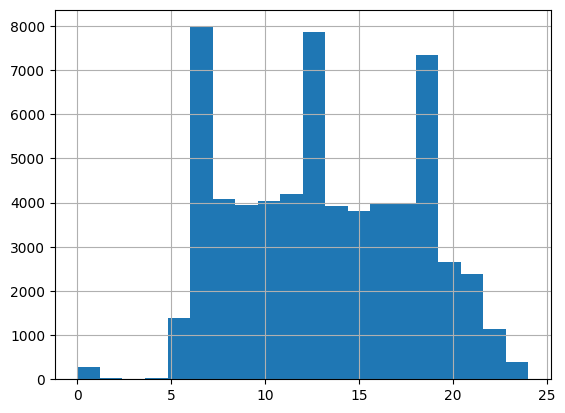

In [58]:
X['DepTime_Hour'].hist(bins=20)


<Axes: >

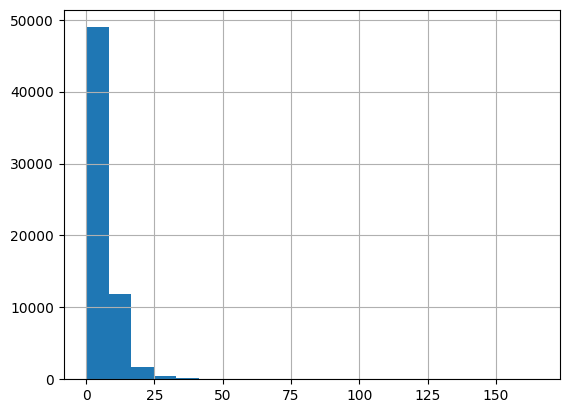

In [59]:
data['TaxiIn'].hist(bins=20)


<Axes: >

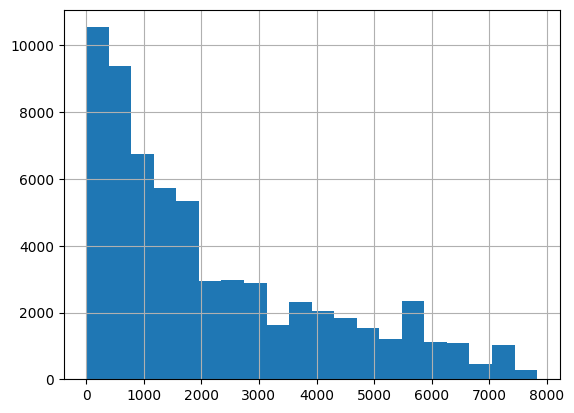

In [60]:
data['FlightNum'].hist(bins=20)


Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

In [61]:
# Проблема: На графиках видно, что признаки имеют совершенно разные диапазоны значений:
# - DepTime_Hour: значения варьируются примерно от 0 до 24 (часы).
# - TaxiIn: распределение сильно скошено влево, основной диапазон 0–50, но есть значения до 150+.
# - FlightNum: значения достигают 7000–8000.
# Из-за такой разницы в масштабах (от единиц до тысяч) линейная регрессия будет работать некорректно:

# 1. Неравнозначный вклад: Признаки с большими абсолютными значениями (например, FlightNum) могут вносить непропорционально большой вклад в предикт модели по сравнению с "маленькими" признаками, даже если они менее важны.
# 2. Проблемы с градиентным спуском: Линии уровня функции потерь будут сильно вытянуты (эллипсы), из-за чего градиентный спуск будет сходиться очень медленно или осциллировать.
# 3. Интерпретация весов: Веса при признаках будут иметь разный порядок, что затруднит понимание того, какой признак реально важнее.
# Как поможет масштабирование: Масштабирование (например, StandardScaler) приведет все признаки к единому виду (среднее значение = 0, стандартное отклонение = 1). Это уровняет "важность" признаков для математического аппарата модели, сделает поверхность функции ошибок более сферической и позволит алгоритму оптимизации (градиентному спуску) сходиться быстрее и стабильнее.

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer

def transform_data(data):
    num_cols = data.select_dtypes(include=[np.number]).columns
    cat_cols = data.select_dtypes(exclude=[np.number]).columns
    
    data_num = data[num_cols].fillna(0)
    data_cat = data[cat_cols].fillna('nan')
    
    scaler = StandardScaler()
    data_num_scaled = scaler.fit_transform(data_num)
    
    data_cat_dict = data_cat.to_dict(orient='records')
    vectorizer = DictVectorizer(sparse=False)
    data_cat_ohe = vectorizer.fit_transform(data_cat_dict)
    
    return np.hstack((data_num_scaled, data_cat_ohe))


Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [63]:
X_transformed = transform_data(X)
print('Трансформированная форма:', X_transformed.shape)

Трансформированная форма: (63404, 628)


**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42)
print('Данные для обучения:', X_train.shape)
print('Данные для теста:', X_test.shape)

Данные для обучения: (44382, 628)
Данные для теста: (19022, 628)


### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train[:1000], y_train[:1000])

y_train_pred = lr.predict(X_train[:1000])
y_test_pred = lr.predict(X_test)

print('Train MSE:', mean_squared_error(y_train[:1000], y_train_pred))
print('Test MSE:', mean_squared_error(y_test, y_test_pred))
print('Train R2:', r2_score(y_train[:1000], y_train_pred))
print('Test R2:', r2_score(y_test, y_test_pred))

Train MSE: 578.6740783081054
Test MSE: 7.738888711181302e+29
Train R2: 0.4539866241563345
Test R2: -5.7853541665380476e+26


Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

In [66]:
from sklearn.linear_model import Ridge, Lasso
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=1.0)
print('Инициализированные модели гребня и лассо')

Инициализированные модели гребня и лассо


__18. (1 балл) __ Обучение линейной регрессии.



Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями?

c:\Users\Yana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.786e+03, tolerance: 1.060e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\Yana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.577e+03, tolerance: 1.060e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\Yana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale 

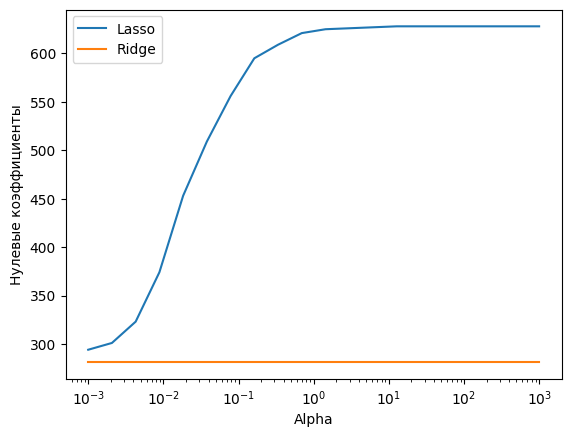

In [71]:
from sklearn.linear_model import Ridge, Lasso
import matplotlib.pyplot as plt

alphas = np.logspace(-3, 3, 20)
lasso_zeros = []
ridge_zeros = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train[:1000], y_train[:1000])
    lasso_zeros.append(np.sum(np.abs(lasso.coef_) < 1e-5))
    
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train[:1000], y_train[:1000])
    ridge_zeros.append(np.sum(np.abs(ridge.coef_) < 1e-5))

plt.plot(alphas, lasso_zeros, label='Lasso')
plt.plot(alphas, ridge_zeros, label='Ridge')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Нулевые коэффициенты')
plt.legend()
plt.show()

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [68]:
def print_metrics(y_true, y_pred, name):
    print(f'{name} RMSE:', np.sqrt(mean_squared_error(y_true, y_pred)))
    print(f'{name} MAE:', np.mean(np.abs(y_true - y_pred)))
    print(f'{name} R2:', r2_score(y_true, y_pred))

ridge = Ridge()
ridge.fit(X_train[:1000], y_train[:1000])
y_test_pred = ridge.predict(X_test)
print_metrics(y_test, y_test_pred, 'Ridge Default')

Ridge Default RMSE: 37.34868418747246
Ridge Default MAE: 20.673107081784163
Ridge Default R2: -0.042802254252187755


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).

In [69]:
from sklearn.model_selection import GridSearchCV, KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
ridge_cv = GridSearchCV(Ridge(), {'alpha': alphas}, cv=kf, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train[:1000], y_train[:1000])

print('Best alpha:', ridge_cv.best_params_)
best_ridge = ridge_cv.best_estimator_
y_test_pred = best_ridge.predict(X_test)
print_metrics(y_test, y_test_pred, 'Ridge Tuned')

Best alpha: {'alpha': 112.88378916846884}
Ridge Tuned RMSE: 35.54089730101194
Ridge Tuned MAE: 18.479430449279235
Ridge Tuned R2: 0.05570405274472212


__19. (0.5 балла)__ Поиск объектов-выбросов


Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

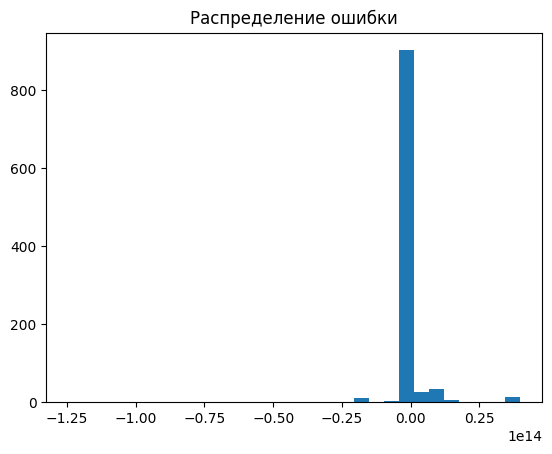

In [72]:
from sklearn.model_selection import cross_val_predict

y_pred_cv = cross_val_predict(LinearRegression(), X_train[:1000], y_train[:1000], cv=5)
errors = y_train[:1000] - y_pred_cv
plt.hist(errors, bins=30)
plt.title('Распределение ошибки')
plt.show()